In [1]:
###############################################
# Load some useful modules
###############################################

import os,sys

#for netcdf files
from netCDF4 import Dataset

#for numeric functions
import numpy as np
import numpy.ma as ma

#plotting functions
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "magnification" which is no longer supported as of 3.3 and will become an error two minor releases later


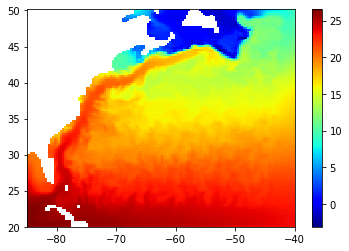

In [4]:
#################################################
# Load data from grid file
#################################################

ncfile='CROCO_FILES/croco_grd.nc'

#open netcdf file
nc = Dataset(ncfile, 'a')

#Load a 4d variable (default coordinates order= t,z,y,x)
lon=np.array(nc.variables['lon_rho'])
lat=np.array(nc.variables['lat_rho'])
mask=np.array(nc.variables['mask_rho'])
mask[mask==0.] = np.nan

#close netcdf file
nc.close()


#################################################
# Load data from netcdf file
#################################################

ncfile='CROCO_FILES/croco_his.nc'

#open netcdf file
nc = Dataset(ncfile, 'r')

#Load SST at last time-step (default coordinates order= t,z,y,x)
temp=np.array(nc.variables['temp'][-1,-1,:,:]) * mask


#close netcdf file
nc.close()


#################################################
# Plot  data
#################################################

# Create a contour plot with 100 levels
plt.pcolormesh(lon,lat,ma.masked_invalid(temp),cmap=plt.cm.jet); 

# plot colorbar
plt.colorbar()

# Save it as a .png file
plt.savefig( 'image.png',  magnification='auto',bbox_inches='tight', dpi=300); 

# Show figure
plt.show()



In [5]:
# some tools to interpolate croco outputs vertically

import tools as to

In [6]:
###################################################################################
#Load variables and parameters 
###################################################################################

nc = Dataset(ncfile, 'r')

temp3d=np.array(nc.variables['temp'][-1,:,:,:])


#Load some parameters

zeta=nc.variables['zeta'][-1,:,:]
topo=nc.variables['h'][:]
pm=nc.variables['pm'][:]
pn=nc.variables['pn'][:]

hc = nc.hc
Cs_r = nc.Cs_r
Cs_w = nc.Cs_w

#close netcdf file
nc.close()

###################################################################################
#Compute vertical coordinates 
###################################################################################

(z_r,z_w) =  to.zlevs(topo,zeta, hc, Cs_r, Cs_w)

###################################################################################
#Interpolate a variable on a given depth
###################################################################################

t400 = to.vinterp(temp3d,z_r,-500,topo=topo,cubic=1)



cubic interpolation


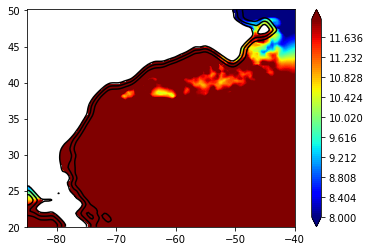

In [7]:
#################################################
# Plot  data
#################################################

# Create a contour plot with 100 levels
plt.contourf(lon,lat,t400,np.linspace(8,12,100),cmap=plt.cm.jet,extend='both'); 
plt.colorbar()

# plot topography contours
plt.contour(lon,lat,topo,[500,1000,2000,5000],colors='k'); 

# Save it as a .png file
#plt.savefig( 'image.png',  magnification='auto',bbox_inches='tight', dpi=300); 

# Show figure
plt.show()

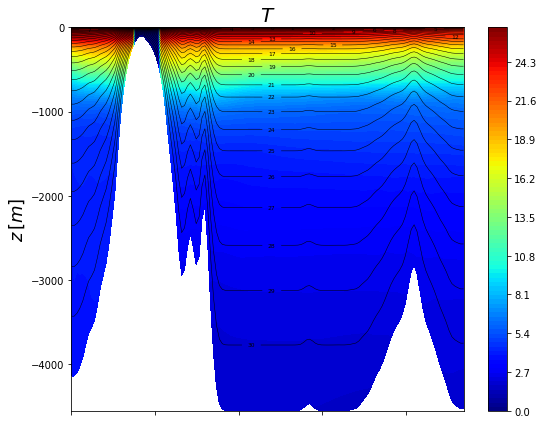

In [8]:
###################################################################################
#Compute vertical coordinates 
###################################################################################


[z,y,x] =np.mgrid[0:z_r.shape[0],0:z_r.shape[1],0:z_r.shape[2]]
x = (x/pm) * 1e-3


#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(8.0,6.0)) 
fig.set_tight_layout(2.)

###################

ax1 = plt.subplot(1,1,1);
plt.contourf(x[:,1,:],z_r[:,1,:],temp3d[:,1,:],100,cmap=plt.cm.jet);plt.colorbar()
#plt.contour(x[:,1,:],z_r[:,1,:],rho[:,1,:],25,  linewidths = (1.,));
CS1 = plt.contour(x[:,1,:],z_r[:,1,:],np.max(z) - z[:,1,:],range(100),colors = ('k',), linewidths = (0.5,)); 
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 
ax1.xaxis.set_major_formatter( NullFormatter() )
plt.ylabel(r'$z\,[m]$',fontsize=18)
plt.title(r'$T$', fontsize=20)

# Save it as a .png file
#plt.savefig( 'image.png',  magnification='auto',bbox_inches='tight', dpi=300); 
#
# Show figure
plt.show()

#################################################
